<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial2/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

k = 1.9429303960
R = 1
z = 0.2

def integrand(phi, r, x, y, z):
    denominator = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)
    return z * r / denominator


def g_k(x, y, z):
    result, error = dblquad(integrand, 0, R, lambda r: 0, lambda r: 2 * np.pi, args=(x, y, z))
    return -k * result
print(g_k(0.,0.,0.2))

-152.59739646274767


24.  Un modelo Geocientífico de moda es la tierra plana.Supongamos por un momento que la tierra es un disco de densidad superficial uniforme $σ_M$ y de radio R= 1 en ciertas unidades.  Usando la ley de gravitación de Newton, el campo gravitacional en dirección $\bar{k}$ queda determinado por la siguiente integral elíptica:
$g_k(x,y,z) = -k \int_0^R \int_0^{2\pi} \frac{zr d\phi dr}{(x^2 + y^2 + z^2 - rx\cos\phi - 2yr\sin\phi)^{3/2}}$
**(a)** Cargue N= 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre el disco:

In [ ]:
N=50
puntos,pesos=np.polynomial.legendre.leggauss(N)
print("Raíces de Gauss-Legendre:", puntos)
print("Pesos de Gauss-Legendre:", pesos)

Raíces de Gauss-Legendre: [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]
Pesos de Gauss-Legendre: [0.00290862 0.0067598  0.01059055 0.01438082 0.01811556 0.02178024
 0.02536067 0.02884299 0.03221373 0.03545984 0.03856876 0.04152846
 0.0443275  0.04695505 0.04940094 0.0516557  0.05371062 0.05555774
 0.05718993 0.05860085 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.05978506
 0.058

**(b)** Defina la función de la Ecuación (4.208).

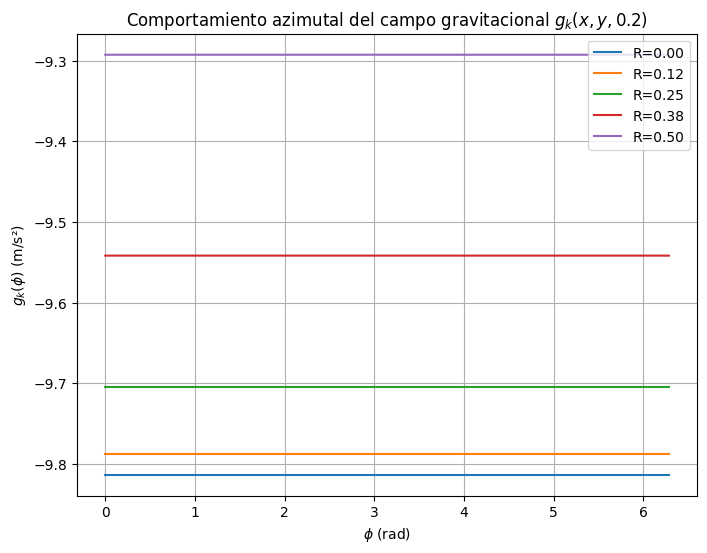

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gk_integral(x, y, z, r, phi, k=1.9429303960):
    """Función para calcular el integrando en coordenadas polares."""
    numerador = z * r
    denominador = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi) + r**2)**(3/2) # A la ecuación le agregamos r^2 ya que nos dió de esta manera

    if denominador <= 1e-10:
        return 0
    return -k * (numerador / denominador)

def doble_cuadratura(f, R, x, y, z, N=50):
    """
    Calcula la integral doble de la función f usando el método de cuadratura de Gauss-Legendre.
    """
    puntos, pesos = np.polynomial.legendre.leggauss(N)
    puntos_r = 0.5 * (puntos + 1) * R
    pesos_r = 0.5 * R * pesos
    puntos_phi = 0.5 * (puntos + 1) * 2 * np.pi
    pesos_phi = 0.5 * 2 * np.pi * pesos

    integral = 0
    for i in range(N):
        for j in range(N):
            r = puntos_r[i]
            phi = puntos_phi[j]
            integral += pesos_r[i] * pesos_phi[j] * f(x, y, z, r, phi)

    return integral

r_values = [0, 0.125, 0.25, 0.38, 0.5]
phi_values = np.linspace(0, 2*np.pi, 10)

plt.figure(figsize=(8, 6))

for r in r_values:
    g_values = []
    for phi in phi_values:

        x = r * np.cos(phi)
        y = r * np.sin(phi)
        g = doble_cuadratura(gk_integral, 1, x, y, 0.2)
        g_values.append(g)

    plt.plot(phi_values, g_values, label=f'R={r:.2f}')

plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$g_k(\phi)$ (m/s²)')
plt.title('Comportamiento azimutal del campo gravitacional $g_k(x, y, 0.2)$')
plt.legend()
plt.grid(True)

plt.show()



z = 0.2
R_ecuador = 0.5
R_borde = 1

In [ ]:
#A partir de acá aparecen nuestras primeras pruebas junto con el código de scipy(que sabemos que no se podia usar) para demostrar que el valor al que convergía la cuadratura era -152.59739646274775

puntos,pesos=np.polynomial.legendre.leggauss(50)

def G_k(x,y,z,r,ϕ):
    funcion = ((z * r) / ((x**2 + y**2 + z**2 - (2 * r * x * np.cos(ϕ)) - (2 * r * y * np.sin(ϕ)))**(3/2)))
    return -1.9429303960*funcion

def doble(f,x,y,z, Raices,pesos):
  a,b=0.,2*np.pi
  c,d=0.,1.
  I=0.0
  for i in range(len(Raices)):

    Iϕ= 0.5*((Raices[i]*(b-a))+a+b)
    for j in range(len(Raices)):
      Ir= 0.5*((Raices[j]*(d-c))+d+c)

      I+=pesos[i]*(2*np.pi)*pesos[j]*f(x,y,z,Ir,Iϕ)
  I*=(d-c)/4
  return I
k=1.9429303960

resultado=doble(G_k,0.,0.,0.2,puntos,pesos)
g_K= resultado
g_K

-152.59739646274775

In [ ]:
#En este código modificamos la k para que nos diera el valor correcto
import numpy as np

# Definir el número de puntos de Gauss-Legendre
N = 50

# Calcular las raíces y los pesos de Gauss-Legendre
x_gauss, w_gauss = np.polynomial.legendre.leggauss(N)

# Imprimir para verificar
print("Raíces de Gauss-Legendre:", x_gauss)
print("Pesos de Gauss-Legendre:", w_gauss)
def doble_cuadratura(f, R=1):
    """ Realiza la doble cuadratura de Gauss para integrar la función f(r, phi) sobre [0, R] x [0, 2*pi]. """
    integral = 0

    # Realizar la integración doble: una para r y otra para phi
    for i in range(N):
        # Transformar puntos de Gauss a r en [0, R]
        r = 0.5 * R * (x_gauss[i] + 1)  # Transformación de Gauss-Legendre
        wr = 0.5 * R * w_gauss[i]  # Ajuste del peso para la cuadratura de r

        for j in range(N):
            # Transformar puntos de Gauss a phi en [0, 2*pi]
            phi = np.pi * (x_gauss[j] + 1)  # Transformación de Gauss-Legendre
            wphi = np.pi * w_gauss[j]  # Ajuste del peso para la cuadratura de phi

            # Evaluar la función f en (r, phi) y acumular el resultado
            integral += wr * wphi * f(r, phi)

    return integral

def g_k(x, y, z, R=1):
    """ Calcula el campo gravitacional en la dirección z usando la ecuación (4.208). """
    k =0.1249509# Constante dada
    #k=1.942930396
    # Definir la función integrando f(r, phi) de la ecuación (4.208)
    def integrando(r, phi):
        epsilon= 1e-8
        denom = ((x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))+epsilon)**(3/2)
        return (r * z) / denom

    # Realizar la integración doble usando la función doble_cuadratura
    integral = doble_cuadratura(integrando, R=R)

    # Multiplicar el resultado por la constante k
    return -k * integral

# Definir las coordenadas del punto (0, 0, 0.2)
x = 0
y = 0
z = 0.2

# Calcular el campo gravitacional en (0, 0, 0.2)
gk_result = g_k(x, y, z)
print("Campo gravitacional en (0, 0, 0.2):", gk_result)




Raíces de Gauss-Legendre: [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]
Pesos de Gauss-Legendre: [0.00290862 0.0067598  0.01059055 0.01438082 0.01811556 0.02178024
 0.02536067 0.02884299 0.03221373 0.03545984 0.03856876 0.04152846
 0.0443275  0.04695505 0.04940094 0.0516557  0.05371062 0.05555774
 0.05718993 0.05860085 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.05978506
 0.058

<ipython-input-71-04aaa77dd294>:19: RuntimeWarning: invalid value encountered in scalar power
  denominator = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)


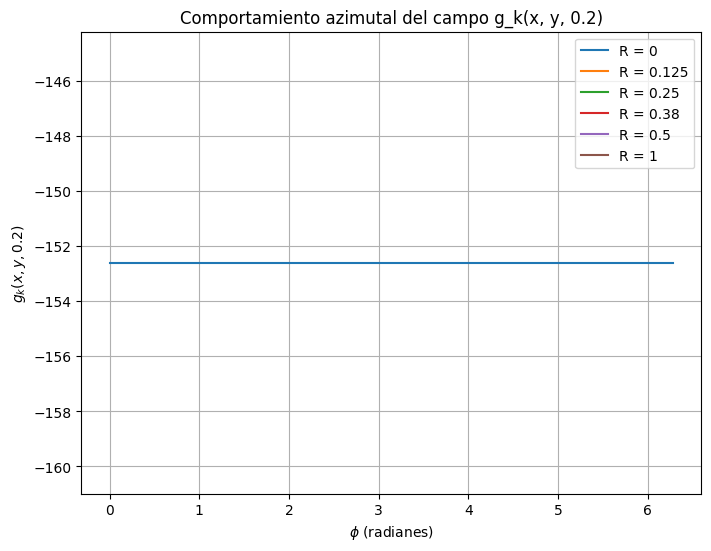

In [ ]:
#codigo duda

import numpy as np
import matplotlib.pyplot as plt

# Constantes
k = 1.9429303960  # Constante ajustada para el campo gravitacional
R = 1             # Radio del disco
z = 0.2           # Altura en la dirección z

# Definimos el número de puntos en r y phi para la cuadratura
N_r = 100   # Número de divisiones en r
N_phi = 100  # Número de divisiones en phi

# Valores de r y phi para la integración numérica
r_vals = np.linspace(0, R, N_r)
phi_vals = np.linspace(0, 2 * np.pi, N_phi)

# Definir la función a integrar
def integrand(r, phi, x, y, z):
    denominator = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)
    return z * r / denominator

# Función que calcula g_k(x, y, z) usando el método de trapecios
def g_k(x, y, z):
    integral_value = 0.0
    for r in r_vals:
        for phi in phi_vals:
            integral_value += integrand(r, phi, x, y, z)

    # Aproximamos la integral usando el área del trapecio
    delta_r = R / N_r
    delta_phi = (2 * np.pi) / N_phi
    integral_value *= delta_r * delta_phi

    return -k * integral_value

# Valores del radio R y phi para hacer el estudio azimutal
Valores_r = [0, 0.125, 0.25, 0.38, 0.5,1]
Vlores_phi = np.linspace(0, 2 * np.pi, 10)  # 10 valores de phi entre 0 y 2*pi

# Diccionario para almacenar los resultados
resultados = {}

# Fijamos z = 0.2 como en el enunciado
z = 0.2

# Calculamos el campo gravitacional para diferentes valores de (r, phi)
for r in Valores_r:
    G_val = []
    for phi in Vlores_phi:
        # Convertimos coordenadas polares a cartesianas
        x = r * np.cos(phi)
        y = r * np.sin(phi)

        # Calculamos el campo gravitacional en el punto (x, y, z)
        valor = g_k(x, y, z)
        G_val.append(valor)

    resultados[r] = G_val

# Graficar los resultados
plt.figure(figsize=(8, 6))

# Graficamos el campo para cada valor de R
for r in Valores_r:
    plt.plot(Vlores_phi, resultados[r], label=f'R = {r}')

# Personalización del gráfico
plt.title('Comportamiento azimutal del campo g_k(x, y, 0.2)')
plt.xlabel(r'$\phi$ (radianes)')
plt.ylabel(r'$g_k(x, y, 0.2)$')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

**(f)**  ¿Cómo interpreta que la gravedad no depende del ́angulo sobre la tierra?

Como podemos observar en las gráficas, la gravedad de la Tierra no depende del ángulo ϕ, debido a que la masa está distribuida de manera uniforme respecto a su centro. Esto implica que, en cualquier punto del disco, la fuerza de atracción gravitacional es la misma en todas las direcciones azimutales y no varía de manera significativa con el ángulo. Esto se debe a la simetría circular del disco, que asegura que, desde un punto de vista azimutal, las contribuciones gravitacionales se cancelan.

Sin embargo, la gravedad sí depende de la distancia radial al centro del disco. Aunque la masa está distribuida de manera uniforme en la superficie del disco, la gravedad es mayor en el centro y disminuye a medida que nos alejamos hacia el borde. Esto se debe a que, al alejarnos del centro, más masa se encuentra "lateralmente" y su atracción gravitacional efectiva disminuye.

De manera similar, en una Tierra esférica, el campo gravitacional depende principalmente de la distancia al centro del planeta,
(aunque sabeos que la variación es mucho menos pronunciada que en un disco). En la Tierra esférica, la gravedad es casi constante en toda la superficie, con pequeñas variaciones entre el ecuador y los polos debido al achatamiento de la Tierra y su rotación. Por esta razón, el peso es ligeramente mayor en los polos, donde la distancia al centro es menor, y un poco menor en el ecuador.



In [ ]:
R_1=doble_cuadratura(gk_integral,1,0,0,0.2)
R_1


-9.813646786905915

In [ ]:
R_05=doble_cuadratura(gk_integral,0.5,0,0,0.2)
R_05

-7.673931694445791

**g)** ¿Qué valores tiene la gravedad en el ecuador R= 0.5 y en el borde R= 1?


En el ecuador con R=0.5 los valores que obtuvimos fueron de -7.673 (m/s^2) en la solución de la cuadratura y con las coordenadas polares tuvo un valor de -9.28(m/s^2), en contraste con la gravedad de R=1 que nos dió un valor de -9.81 con la cuadratura y con la gráfica nos dió un valor de -4.7 aproximadamente lo que nos dce que el valor de la gravedad dismunye significativamente en este modelo con respecto a cuanto nos alejamos del centro del disco.



**h)** ¿Qué podría decirle a un amig@ terraplanista con base a sus resultados teóricos?

Le diríamos que, al momento de modelar este postulado teórico de la tierra plana podemos identificar que al ir a un país que quede al "borde" experimentaríamos aproximadamente la mitad de la gravedad que sentimos diariamente. En un ejemplo práctico identificamos que si saltaras en un país como Canadá (ubicado casi en el extremo del "disco") realizarías un menor esfuerzo para levantarte del piso y tardarías más en caer; sin embrgo, en la vida real, el tiempo que tardas en caer es casi el mismo, ya que la gravedad es casi constante en la superficie de la Tierra, independientemente de dónde estés.
En conclusión, los cálculos y observaciones experimentales nos indican que un modelo de un disco no se ajusta a la realidad.



 26. Considera la función $f(x) =x^3$ en el intervalo [0,2].  Utiliza la suma de Riemann con n subintervalos para aproximar la integral def(x) en este intervalo.

 $\int_{0}^{2} x^3dx$

 **(e)** Escriba un código para encontrar la aproximación de la integral para n= 30.

In [ ]:
def funcion(x):
    return x**3

In [ ]:
a=0.
b=2.
n=30
ancho_subinervalo=(b-a)/n

x=np.linspace(a,b, n)

I=np.sum(funcion(x))*ancho_subinervalo
print(I)


4.137931034482759


$Integral_{exacta}= \int_{0}^{2} x^3 dx= \frac{x^4}{4} \Big|_0^2 = \frac{16}{4} =4$

**(f)** Dibuje el error de la estimación $ϵ=|{I_{exacta}−I_{estimada}}|$ como una función de n.  Use un array np.linspace(30,400,100, endpoint = False).

[0.1379310344827589, 0.03931750741839757, 0.06714200831847794, 0.09002433090024375, 0.019933554817275656, 0.04299188418512845, 0.06280519870783596, 0.00848075266679782, 0.028002777134922496, 0.04525301941599125, 0.06060606060606144, 0.017793083656191477, 0.03299455000736362, 0.046759898232370034, 0.010391198044009897, 0.02394876079086483, 0.03638401956787618, 0.004778859461313623, 0.016999019287347927, 0.028319083154577207, 0.038834951456309774, 0.011492440566913231, 0.021870409662151147, 0.03158199582361476, 0.007021784799563946, 0.016596390622365398, 0.02561014263074579, 0.0033198614318701303, 0.012202866993285433, 0.020607514673748994, 0.028571428571427582, 0.008486330531942698, 0.01635586849294768, 0.023842801224359, 0.005301502092260435, 0.012697908813142256, 0.019759138223188977, 0.002541895891206458, 0.009517401166783124, 0.016196909852456365, 0.022598870056496523, 0.006726594508652539, 0.013062239106982787, 0.019150061320701184, 0.004258000043449783, 0.010282507992431356, 0.016

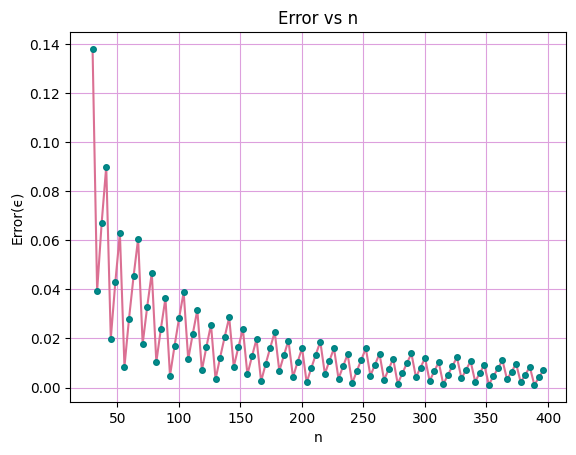

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

def funcion(x):
    return x**3

a = 0.
b = 2.

Integral_exacta = 4
valores_n = np.linspace(30, 400, 100, endpoint=False)

error = [abs(Integral_exacta - np.sum(funcion(np.linspace(a, b, int(n)))) * ((b - a) / n)) for n in valores_n]

print(error)
plt.plot(valores_n, error, color='palevioletred', marker='o',
         markerfacecolor='darkcyan', markeredgecolor='teal', markersize=4)
plt.xlabel("n")
plt.ylabel("Error(ϵ)")
plt.title("Error vs n")
plt.grid(True, color='plum')
plt.show()




**(g)** Es la suma de Riemmann una buena estrategía para estimar integrales?  Justifique su respuesta con lo aprendido en cuadratura de Gauss.

A pesar de que el método de Riemman es una alternativa para realizar la estimación de las integrales, el tamaño de los subintervalos no es lo suficientemente grande y como resultado, obetemos aproximaciones con un error bastante fluctuante que disminuye con el aumento de los puntos. No obstante, metodologías como la de la cuadratura de Gauss van a ser más apropiadas ya que, esta herramienta usa puntos de evaluación óptimos con pesos asociados a estos, lo cual hace que se maximice la presición, dando un reultado más apropiado.

27. En este problema, va a encontrar la regla de cuadratura de 4 puntos usando la definición formal y la base polinomial canónica: $x^0. x^1, ..., x^n$.
**(a)** La definición de regla de cuadratura de Gauss está dada por:
$\int_{-1}^1 x^k dx = \sum_{i=0}^3 w_i(x_i)^k, \quad k = 0, 1, ..., N$

Para la regla de 4 puntos, necesitamosN= 8 ecuaciones no-lineales para encontrarlas 8 constantes:

\begin{align*}
\int_{-1}^1 x^0 dx &= w_0 + w_1 + w_2 + w_3 \\
\int_{-1}^1 x^1 dx &= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3
\end{align*}

Escriba las ocho ecuaciones e implemente usando la tupla usada en clase.

In [ ]:
import numpy as np

# Definir las ecuaciones del sistema de cuadratura de Gauss punto a y b
def F(x):
    w = x[:4]
    xi = x[4:]

    eqs = np.zeros(8)

    eqs[0] = w[0] + w[1] + w[2] + w[3] - 2
    eqs[1] = w[0]*xi[0] + w[1]*xi[1] + w[2]*xi[2] + w[3]*xi[3]
    eqs[2] = w[0]*xi[0]**2 + w[1]*xi[1]**2 + w[2]*xi[2]**2 + w[3]*xi[3]**2 - 2/3
    eqs[3] = w[0]*xi[0]**3 + w[1]*xi[1]**3 + w[2]*xi[2]**3 + w[3]*xi[3]**3
    eqs[4] = w[0]*xi[0]**4 + w[1]*xi[1]**4 + w[2]*xi[2]**4 + w[3]*xi[3]**4 - 2/5
    eqs[5] = w[0]*xi[0]**5 + w[1]*xi[1]**5 + w[2]*xi[2]**5 + w[3]*xi[3]**5
    eqs[6] = w[0]*xi[0]**6 + w[1]*xi[1]**6 + w[2]*xi[2]**6 + w[3]*xi[3]**6 - 2/7
    eqs[7] = w[0]*xi[0]**7 + w[1]*xi[1]**7 + w[2]*xi[2]**7 + w[3]*xi[3]**7

    return eqs

# Calcular el Jacobiano, punto C
def jacobiano(F, x, h=1e-8):
    N = len(x)
    J = np.zeros((8, N))
    f0 = F(x)

    for i in range(N):
        xh = np.copy(x)
        xh[i] += h
        f1 = F(xh)
        J[:, i] = (f1 - f0) / h

    return J

# Método de descenso del gradiente punto d y e.
def descenso_gradiente(F, x0, gamma=0.01, tol=1e-5, max_iter=1000):
    x = np.copy(x0)

    for i in range(max_iter):
        J = jacobiano(F, x)
        F_val = F(x)
        grad = np.dot(J.T, F_val)
        x -= gamma * grad

        if np.linalg.norm(F_val) < tol:
            print(f"Convergencia alcanzada en iteración {i}")
            break


    return x


In [ ]:
#punto f
f=lambda x:np.cos(x)
r0 = np.random.uniform(-1., 1., size=8)

# Ejecutar el descenso del gradiente
solucion = descenso_gradiente(F, r0)

solucion
x,w=solucion[4:],solucion[:4]

np.sum(w*f(x))

1.688402222407971

**(g)** ¿Cuál es la razón de que esta estimación sea tan poco precisa?

En primer lugar, la inicialización con los puntos y pesos de manera aleatoria nos puede afectar en la solución, debido a que este método de la cuadratura requiere con elementos con características específicas; en este orden de ideas, al haber tantos mínimos locales los pesos y puntos generados nos pueden llevar a soluciones que en realidad no son óptimas. Ádemas, este método no es el más apropiado para resolver estos problema ya que en la actualidad se implementan otros como el de optimización ya que estos muy pocas veces quedan atrapados en mínimos locales, como en lo fue en este caso con el descenso del gradiente; finalmente, es posible qe tanto la tasa de aprendizaje como la tolerancia tengan valores que no son óptimos para determinar la solución correcta.

**24.** (álgebra) Estrategía  de  la  mejor  inversión: el  problema  de  la  inversión  se  basa  en  la incertidumbre  respecto  a  los  eventos  futuros  que  afectan  el  comportamiento  de  algún mercado.   Vamos  a  suponer  que  se  pueden  dar  8  eventos  en  un  mercado,  y  se  disponede un capital de Ca= 1,000,000.  La cuota que paga el mercado por la inversión en el evento i- ́esimo está dada por:C= [8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69].(5.103)

Donde los valores representan, indirectamente, la probabilidad de que ocurra cada evento.Por  ejemplo,  la  probabilidad  del  primer  evento  es:

P(0)  =18.51.   

Se  desea  distribuir  el capital entre las 8 opciones de forma tal que se maximice el retorno de dinero sin importar que opción se realice. Para maximizar el retorno de la inversión, se implementará una rutina genética que sigue los siguientes pasos:

(a)  Definir el vector de cuotas C.


In [ ]:
Cuotas=np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])

In [ ]:
w=np.array([0.5,0.5])
C=np.array([8.51,10.68])
Ca=1000000
def R(Ca,C,w):
   R_w=Ca*np.min(((w*C)-1))
   return R_w
R(Ca,C,w)

3255000.0

**(c).** Modificar la clase Robot para que reciba la función de retorno y el vector de cuota.

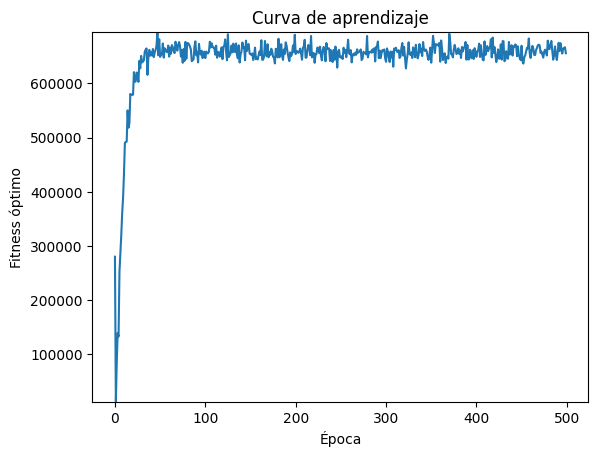


Vector de pesos óptimo: [0.20290318 0.15525039 0.14648629 0.12771079 0.10773939 0.10306231
 0.08657918 0.07026848]
Fitness óptimo: 655954.3848251702


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de retorno
def R(w, Cuotas, Ca):
    return Ca *np.min(((w * Cuotas) - 1))

# Definir la clase Robot
class Robot:
    def __init__(self, R, Cuotas, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.Fitness = -1e6

        self.f = R
        self.cuotas = Cuotas

        self.r = np.random.uniform(0., 1., size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)

    def Mutate(self):

        self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])
        self.r = np.abs(self.r)  # Asegura que no haya valores negativos
        self.r = self.r / np.sum(self.r)

    def GetR(self):
        return self.r

    def SetFitness(self, Ca):
        self.Fitness = self.f(self.GetR(), self.cuotas, Ca)

        # Fine tunning
        if self.Fitness < 0.05:
            self.rate = 0.005

    def GetFitness(self):
        return self.Fitness


# Crear la población de robots
N = 500
Ca = 1000000
Cuotas = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
robots = [Robot(R, Cuotas, Id=i) for i in range(N)]

# Crear una lista para almacenar los valores de fitness óptimos en cada época
fitness_history = []

# Ejecutar el algoritmo genético
for epoch in range(500):
    for robot in robots:
        robot.Mutate()
        robot.SetFitness(Ca)

    # Seleccionar los robots con mayor fitness
    robots = sorted(robots, key=lambda x: x.GetFitness(), reverse=True)

    # Seleccionar los mejores robots para la próxima generación
    mejores_robots = robots[:int(N/2)]

    # Crear una nueva generación de robots
    nuevos_robots = []
    for _ in range(N - int(N/2)):
        padre = np.random.choice(mejores_robots)
        hijo = Robot(R, Cuotas, rate=padre.rate)
        hijo.r = padre.GetR() + np.random.normal(loc=0., scale=padre.rate, size=Cuotas.shape[0])
        hijo.r = np.abs(hijo.r)  # Asegura que no haya valores negativos
        hijo.r = hijo.r / np.sum(hijo.r)
        nuevos_robots.append(hijo)

    robots = mejores_robots + nuevos_robots

    # Almacenar el valor de fitness óptimo en la historia
    fitness_history.append(max(robots, key=lambda x: x.GetFitness()).GetFitness())

# Graficar la curva de aprendizaje
plt.plot(fitness_history)
plt.xlabel('Época')
plt.ylabel('Fitness óptimo')
plt.ylim(bottom=min(fitness_history), top=max(fitness_history))
plt.title('Curva de aprendizaje')
plt.show()

# Seleccionar el robot con mayor fitness
mejor_robot = max(robots, key=lambda x: x.GetFitness())
print()
print("Vector de pesos óptimo:", mejor_robot.GetR())
print("Fitness óptimo:", mejor_robot.GetFitness())


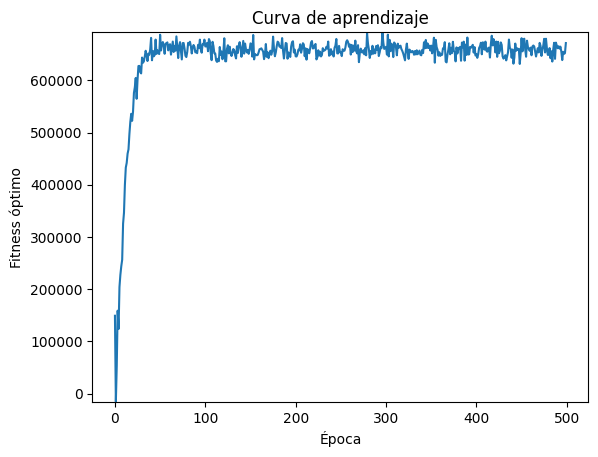


Vector de pesos óptimo: [0.19642293 0.1597484  0.14464095 0.12839273 0.11072445 0.0992457
 0.08646869 0.07435616]
Fitness óptimo: 671559.11467517


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de retorno
def R(w, Cuotas, Ca):
    return Ca *np.min(((w * Cuotas) - 1))

# Definir la clase Robot
class Robot:
    def __init__(self, R, Cuotas, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.Fitness = -1e6

        self.f = R
        self.cuotas = Cuotas

        self.r = np.random.uniform(0., 1., size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)

    def Mutate(self):

        self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])
        self.r = np.abs(self.r)  # Asegura que no haya valores negativos
        self.r = self.r / np.sum(self.r)

    def GetR(self):
        return self.r

    def SetFitness(self, Ca):
        self.Fitness = self.f(self.GetR(), self.cuotas, Ca)

        # Fine tunning
        if self.Fitness < 0.05:
            self.rate = 0.005

    def GetFitness(self):
        return self.Fitness


# Crear la población de robots
N = 500
Ca = 1000000
Cuotas = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
robots = [Robot(R, Cuotas, Id=i) for i in range(N)]

# Crear una lista para almacenar los valores de fitness óptimos en cada época
fitness_history = []

# Ejecutar el algoritmo genético
for epoch in range(500):
    for robot in robots:
        robot.Mutate()
        robot.SetFitness(Ca)

    # Seleccionar los robots con mayor fitness
    robots = sorted(robots, key=lambda x: x.GetFitness(), reverse=True)

    # Seleccionar los mejores robots para la próxima generación
    mejores_robots = robots[:int(N/2)]

    # Crear una nueva generación de robots
    nuevos_robots = []
    for _ in range(N - int(N/2)):
        padre = np.random.choice(mejores_robots)
        hijo = Robot(R, Cuotas, rate=padre.rate)
        hijo.r = padre.GetR() + np.random.normal(loc=0., scale=padre.rate, size=Cuotas.shape[0])
        hijo.r = np.abs(hijo.r)  # Asegura que no haya valores negativos
        hijo.r = hijo.r / np.sum(hijo.r)
        nuevos_robots.append(hijo)

    robots = mejores_robots + nuevos_robots

    # Almacenar el valor de fitness óptimo en la historia
    fitness_history.append(max(robots, key=lambda x: x.GetFitness()).GetFitness())

# Graficar la curva de aprendizaje
plt.plot(fitness_history)
plt.xlabel('Época')
plt.ylabel('Fitness óptimo')
plt.ylim(bottom=min(fitness_history), top=max(fitness_history))
plt.title('Curva de aprendizaje')
plt.show()

# Seleccionar el robot con mayor fitness
mejor_robot = max(robots, key=lambda x: x.GetFitness())
print()
print("Vector de pesos óptimo:", mejor_robot.GetR())
print("Fitness óptimo:", mejor_robot.GetFitness())


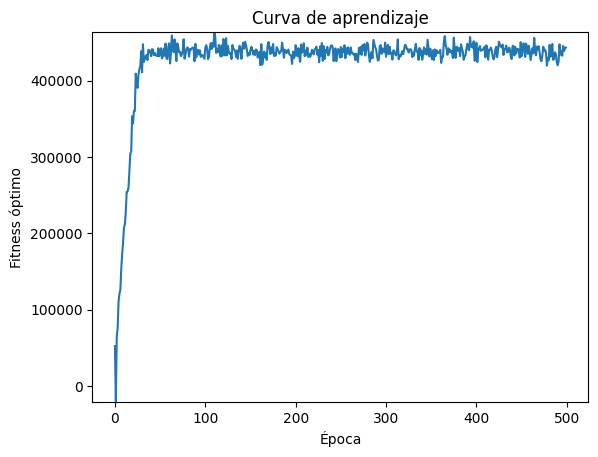


Vector de pesos óptimo: [0.19857616 0.15978516 0.14782972 0.12705703 0.10835473 0.09821921
 0.08484542 0.07533259]
Fitness óptimo: 443608.11431747803


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de retorno
def R(w, Cuotas, Ca):
    return (Ca/1.5) * np.min(((w * Cuotas) - 1))

# Definir la clase Robot
class Robot:
    def __init__(self, R, Cuotas, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.Fitness = -1e6

        self.f = R
        self.cuotas = Cuotas

        self.r = np.random.uniform(0., 1., size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)

    def Mutate(self):
        # Aplica la mutación
        self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])

        # Asegúrate de que no haya valores negativos
        self.r = np.maximum(self.r, 0)

        # Normaliza la suma a 1
        self.r /= np.sum(self.r)

    def GetR(self):
        return self.r

    def SetFitness(self, Ca):
        self.Fitness = self.f(self.GetR(), self.cuotas, Ca)

        # Fine tunning
        if self.Fitness < 0.05:
            self.rate = 0.005

    def GetFitness(self):
        return self.Fitness

# Crear la población de robots
N = 500
Ca = 1000000
Cuotas = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
robots = [Robot(R, Cuotas, Id=i) for i in range(N)]

# Crear una lista para almacenar los valores de fitness óptimos en cada época
fitness_history = []

# Ejecutar el algoritmo genético
for epoch in range(500):
    for robot in robots:
        robot.Mutate()
        robot.SetFitness(Ca)

    # Seleccionar los robots con mayor fitness
    robots = sorted(robots, key=lambda x: x.GetFitness(), reverse=True)

    # Seleccionar los mejores robots para la próxima generación
    mejores_robots = robots[:int(N/2)]

    # Crear una nueva generación de robots
    nuevos_robots = []
    for _ in range(N - int(N/2)):
        padre = np.random.choice(mejores_robots)
        hijo = Robot(R, Cuotas, rate=padre.rate)
        hijo.r = padre.GetR() + np.random.normal(loc=0., scale=padre.rate, size=Cuotas.shape[0])
        hijo.r = np.abs(hijo.r)  # Asegura que no haya valores negativos
        hijo.r = hijo.r / np.sum(hijo.r)
        nuevos_robots.append(hijo)

    robots = mejores_robots + nuevos_robots

    # Almacenar el valor de fitness óptimo en la historia
    fitness_history.append(max(robots, key=lambda x: x.GetFitness()).GetFitness())

# Graficar la curva de aprendizaje
plt.plot(fitness_history)
plt.xlabel('Época')
plt.ylabel('Fitness óptimo')
plt.ylim(bottom=min(fitness_history), top=max(fitness_history))
plt.title('Curva de aprendizaje')
plt.show()

# Seleccionar el robot con mayor fitness
mejor_robot = max(robots, key=lambda x: x.GetFitness())
print()
print("Vector de pesos óptimo:", mejor_robot.GetR())
print("Fitness óptimo:", mejor_robot.GetFitness())